# Data Analysis

Here we need a `.csv` file in order to do the desired analysis.

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv('formatted_data_nov03.csv')
df["datetime"] = pd.to_datetime(df["Datetime"])
# df = df.set_index('datetime')
del df["Datetime"]
df["approx datetime"] = df["datetime"].round('1min') # redondeamos a los X mins más cercanos (X según frec. de los videos)

# del df["Turbidity"]
# del df["pH"]
# del df["Light"]
df = df.sort_values('datetime', ignore_index=True)
# df = df.sort_index()
df.head(10)

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,Light,UV,Turbidity,Dissolved Oxygen,pH,Total Dissolved Solids,datetime,approx datetime
0,16.13,13.9,86.0,31.39,805.0,13.0,0.0,-1466.85,7.70,1.87,279.61,2021-11-03 01:28:01,2021-11-03 01:28:00
1,16.19,13.9,86.0,31.41,809.0,13.0,0.0,-1682.96,7.57,2.10,277.95,2021-11-03 01:28:06,2021-11-03 01:28:00
2,16.19,13.9,86.0,30.98,779.0,13.0,0.0,-1452.62,7.61,2.09,278.78,2021-11-03 01:28:11,2021-11-03 01:28:00
3,16.13,13.9,86.0,31.51,807.0,13.0,0.0,-1424.23,7.79,2.12,275.48,2021-11-03 01:28:16,2021-11-03 01:28:00
4,16.19,13.9,86.0,31.49,796.0,13.0,0.0,-1610.36,7.66,2.09,277.13,2021-11-03 01:28:21,2021-11-03 01:28:00
5,16.13,13.9,86.0,31.41,783.0,12.0,0.0,-1410.07,7.66,1.98,277.95,2021-11-03 01:28:26,2021-11-03 01:28:00
6,16.13,13.9,86.0,30.73,811.0,13.0,0.0,-1481.10,7.74,1.88,280.44,2021-11-03 01:28:31,2021-11-03 01:29:00
7,16.19,13.9,86.0,31.10,771.0,13.0,0.0,-1452.62,7.66,1.99,277.13,2021-11-03 01:28:36,2021-11-03 01:29:00
8,16.19,13.9,86.0,31.03,783.0,13.0,0.0,-1481.10,7.74,1.94,275.48,2021-11-03 01:28:41,2021-11-03 01:29:00
9,16.13,13.9,86.0,31.41,833.0,13.0,0.0,-1438.41,7.74,2.09,277.95,2021-11-03 01:28:46,2021-11-03 01:29:00


In [5]:
start_time = df.head(1)['datetime']
end_time = df.tail(1)['datetime']

print(f"Data starts at: {start_time}")
print(f"Data ends at: {end_time}")

Data starts at: 0   2021-11-03 01:28:01
Name: datetime, dtype: datetime64[ns]
Data ends at: 18146   2021-11-04 01:27:56
Name: datetime, dtype: datetime64[ns]


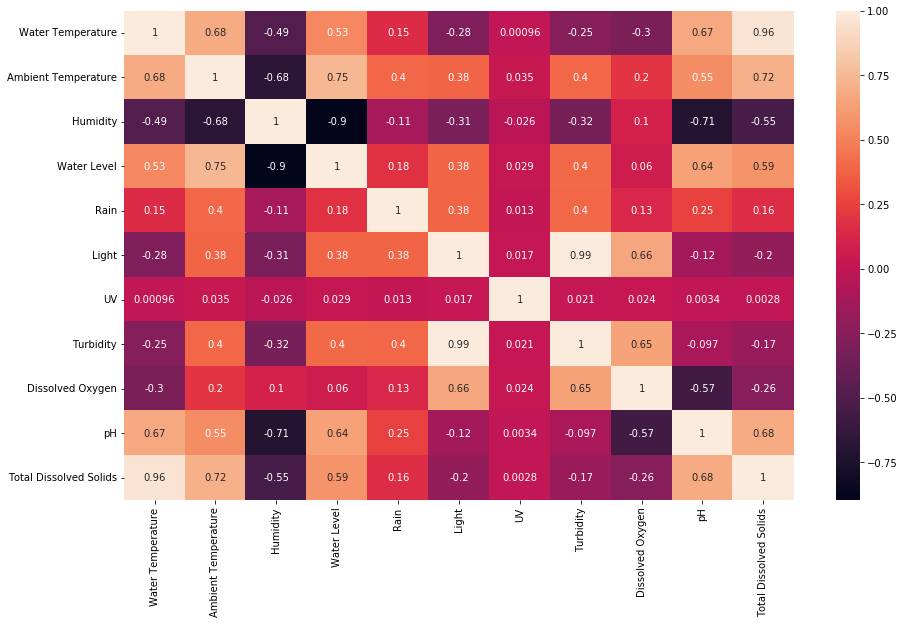

In [6]:
#understanding correlation
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

## Strongly Correlated Variables

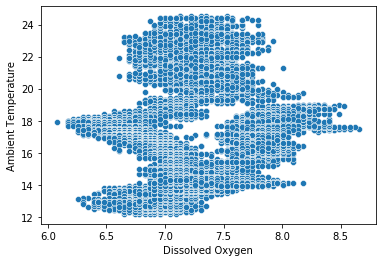

In [7]:
sns.scatterplot(x=df["Dissolved Oxygen"], y=df["Ambient Temperature"], data=df)

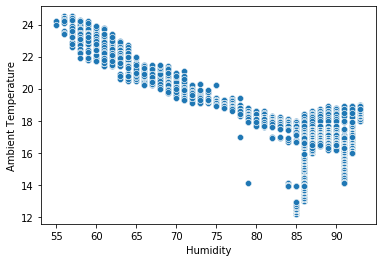

In [8]:
sns.scatterplot(x=df["Humidity"], y=df["Ambient Temperature"], data=df)

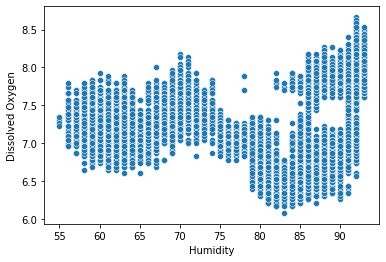

In [9]:
sns.scatterplot(x=df["Humidity"], y=df["Dissolved Oxygen"], data=df)

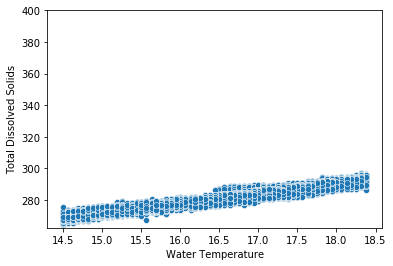

In [10]:
scatter = sns.scatterplot(x=df["Water Temperature"], y=df["Total Dissolved Solids"], data=df)
scatter.set_ylim(top=400);

## Weakly/Not at all Corelated Variables

(25, 40)

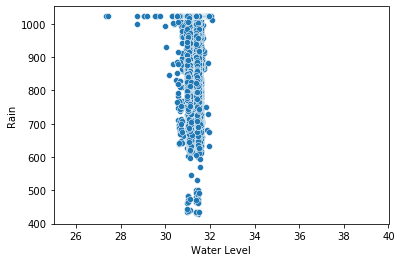

In [11]:
scatter = sns.scatterplot(x=df["Water Level"], y=df["Rain"], data=df)
scatter.set_xlim(left=25, right=40)

# Merging Video Data with Physicochemical Vars

In [17]:
video_df = pd.read_csv('video_data_Nov3.csv')
video_df["datetime"] = pd.to_datetime(video_df["timestamp"])
del video_df["timestamp"]
video_df["approx datetime"] = video_df["datetime"].round('1min') # redondeamos a los X mins más cercanos (X según frec. de los videos)
# video_df = video_df.set_index('datetime')

video_df = video_df.sort_values('datetime', ignore_index=True)
# video_df = video_df.sort_index()

In [24]:
video_df = video_df[video_df['Average Distance'] != -1]

video_df.head()

,Average Distance,Average X,Average Y,Average Pairwise Distance,datetime,approx datetime
0,17449.6815,211,118,121.0598,2021-11-03 13:42:29,2021-11-03 13:42:00
1,15651.2526,284,134,120.5914,2021-11-03 13:43:29,2021-11-03 13:43:00
2,11962.1188,248,105,122.6562,2021-11-03 13:44:29,2021-11-03 13:44:00
3,18065.0385,243,136,149.5691,2021-11-03 13:45:29,2021-11-03 13:45:00
4,35288.4105,236,193,167.9318,2021-11-03 13:46:30,2021-11-03 13:46:00


In [25]:
df.head()

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,Light,UV,Turbidity,Dissolved Oxygen,pH,Total Dissolved Solids,datetime,approx datetime
0,16.13,13.9,86.0,31.39,805.0,13.0,0.0,-1466.85,7.70,1.87,279.61,2021-11-03 01:28:01,2021-11-03 01:28:00
1,16.19,13.9,86.0,31.41,809.0,13.0,0.0,-1682.96,7.57,2.10,277.95,2021-11-03 01:28:06,2021-11-03 01:28:00
2,16.19,13.9,86.0,30.98,779.0,13.0,0.0,-1452.62,7.61,2.09,278.78,2021-11-03 01:28:11,2021-11-03 01:28:00
3,16.13,13.9,86.0,31.51,807.0,13.0,0.0,-1424.23,7.79,2.12,275.48,2021-11-03 01:28:16,2021-11-03 01:28:00
4,16.19,13.9,86.0,31.49,796.0,13.0,0.0,-1610.36,7.66,2.09,277.13,2021-11-03 01:28:21,2021-11-03 01:28:00


In [26]:
merged_df = pd.merge(df, video_df, on="approx datetime")
del merged_df['datetime_x'] # (Original formatted_data_ timestamp) Column with the same name
del merged_df['datetime_y'] # (Original video_data timestamp) Column with the same name
merged_df.head()

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,Light,UV,Turbidity,Dissolved Oxygen,pH,Total Dissolved Solids,approx datetime,Average Distance,Average X,Average Y,Average Pairwise Distance
0,16.63,23.1,61.0,53.93,1023.0,1019.0,765.0,3031.52,7.00,3.93,285.46,2021-11-03 13:42:00,17449.6815,211,118,121.0598
1,15.81,17.1,88.0,31.49,1023.0,997.0,135.0,2815.97,8.01,2.20,274.65,2021-11-03 13:42:00,17449.6815,211,118,121.0598
2,16.63,23.1,62.0,53.95,1023.0,1010.0,825.0,2943.29,6.87,3.98,287.15,2021-11-03 13:42:00,17449.6815,211,118,121.0598
3,15.81,17.0,89.0,31.19,1023.0,983.0,135.0,2842.34,7.79,2.20,278.78,2021-11-03 13:42:00,17449.6815,211,118,121.0598
4,16.63,23.1,62.0,53.93,1023.0,1021.0,890.0,3031.52,6.91,3.94,283.78,2021-11-03 13:42:00,17449.6815,211,118,121.0598


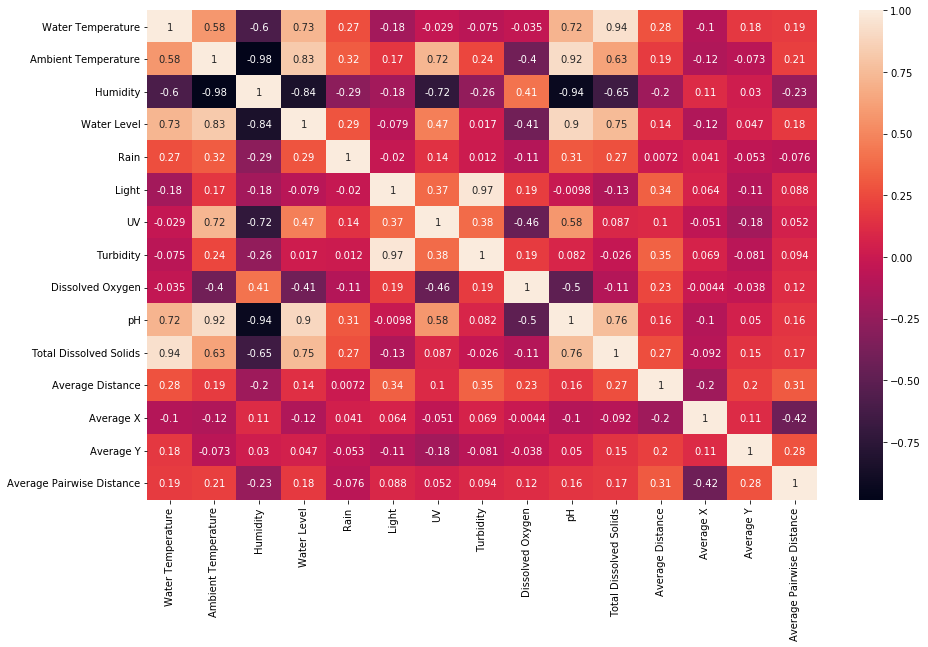

In [27]:
#understanding correlation
plt.figure(figsize = (15,9))
sns.heatmap(merged_df.corr(), annot = True)

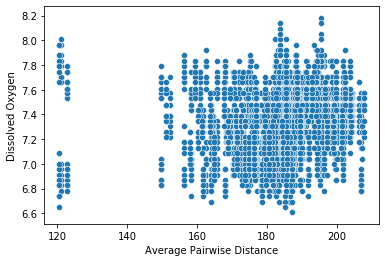

In [29]:
scatter = sns.scatterplot(x=merged_df["Average Pairwise Distance"], y=merged_df["Dissolved Oxygen"], data=df)
# scatter.set_ylim(top=400);